In [25]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300 
import matplotlib.pyplot as plt
import sys  
import pandas as pd
#sys.path.append("../")  
from pulse_analysis import *

In [2]:
filename = './data/pulseSweep_0_16_1w_100rep_0_128.pcap'

In [3]:
nmbrWin = 16
rep = 100
sweepPositions = 128
df=process_packet_pulseSweep(filename,0,nmbrWin)


204800
ALL PACKETS CONVERTED


In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,12790,12791,12792,12793,12794,12795,12796,12797,12798,12799
0,210,202,202,204,202,202,201,204,201,201,...,199,200,202,199,200,200,199,199,200,199
1,211,201,201,204,201,201,201,204,204,204,...,202,202,202,202,202,202,202,202,201,199
2,217,200,200,203,200,200,200,203,203,203,...,198,201,201,201,198,201,199,198,200,201
3,217,203,200,202,203,200,202,203,202,203,...,201,201,201,201,201,200,198,201,200,201
4,216,202,203,204,203,203,202,203,203,204,...,201,201,201,200,202,201,200,200,201,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,204,202,202,202,202,202,202,201,201,201,...,199,199,199,200,199,199,199,199,199,202
508,201,201,201,201,204,204,204,201,204,201,...,200,200,199,199,200,199,199,199,199,202
509,203,203,204,202,203,203,203,202,206,203,...,199,202,199,199,199,199,202,200,199,200
510,201,201,201,201,201,202,202,202,201,201,...,202,202,199,199,199,199,199,199,199,202


In [5]:
df=df-200

Window 8 to 12

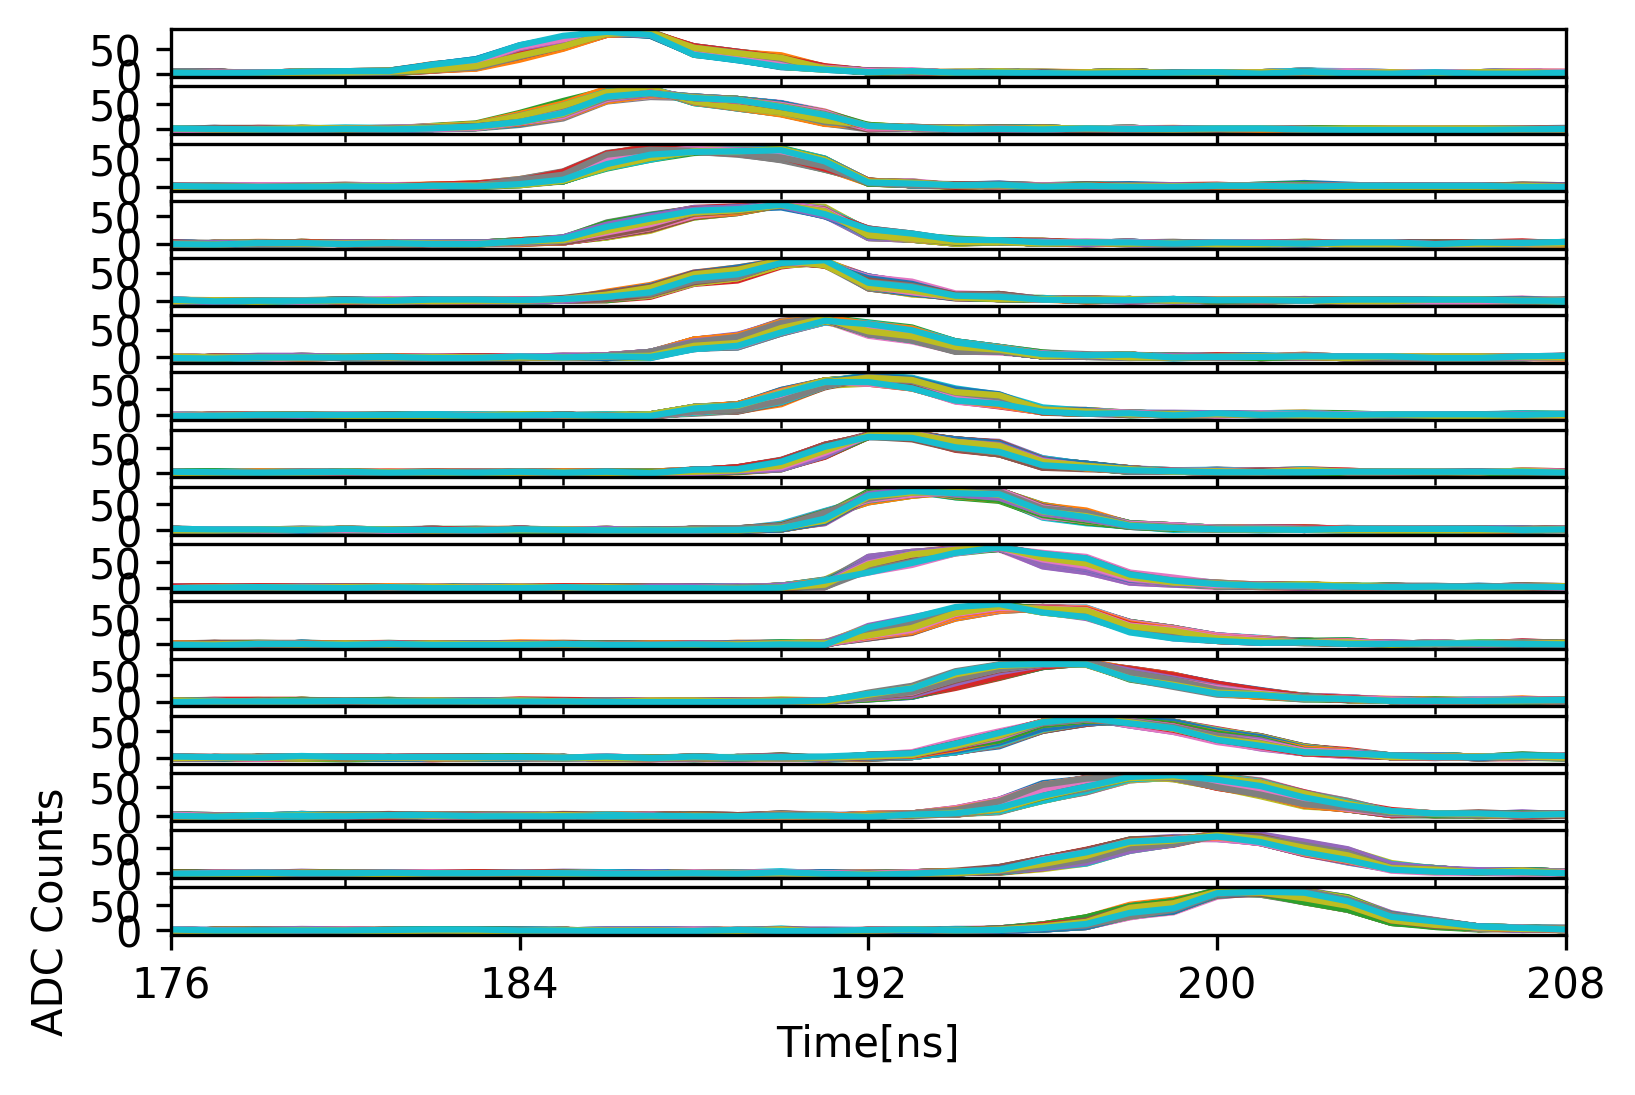

In [26]:
nmbrSamples= 32*nmbrWin
sweepPositions= 16
#rep=40pulseSweep_0_511_1w_1rep_0_500_100_osc_5.pcap
fig, axes = plt.subplots(sweepPositions, 1)
for i in range(0,sweepPositions,1):
    df.iloc[:,i*rep:(i+1)*rep].plot(ax=axes[i], xticks=list(range(32*5,32*10,8)), legend=False, sharex=True, xlim=((32*5)+16,32*7-16) )  
  #  plt.text(0.5, 0.5, '{}'.format(i), horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
   # axes[i].scatter(df.iloc[:,rep*i:rep*(i+1)].idxmax(),df.iloc[:,rep*i:rep*(i+1)].max(), marker='o', c='k')
#    axes[i].grid()
plt.xlabel('Time[ns]')
plt.ylabel('ADC Counts')
#plt.subplots_adjust( bottom=18, top=31)
#plt.savefig('PulseSweep.png')
plt.show()

In [7]:
df_max= df.max()
df_idxmax=df.idxmax()

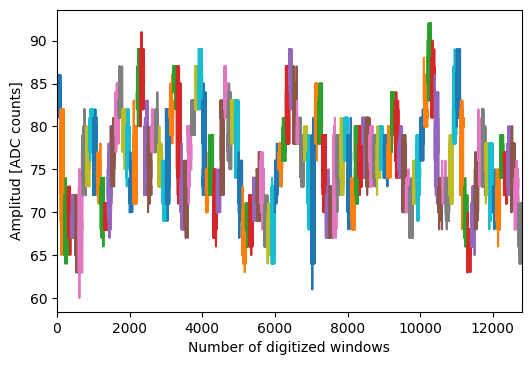

In [8]:
standard = list()
avg = list()
fig3, axes3 = plt.subplots(1, 1)
for l in range(0,sweepPositions,1):
    df_max[l*rep:(l+1)*rep].plot()
    standard.append(df_max[l*rep:(l+1)*rep].std())
    avg.append(df_max[l*rep:(l+1)*rep].mean())
axes3.set(xlabel= 'Number of digitized windows', ylabel='Amplitud [ADC counts]' )

plt.show()

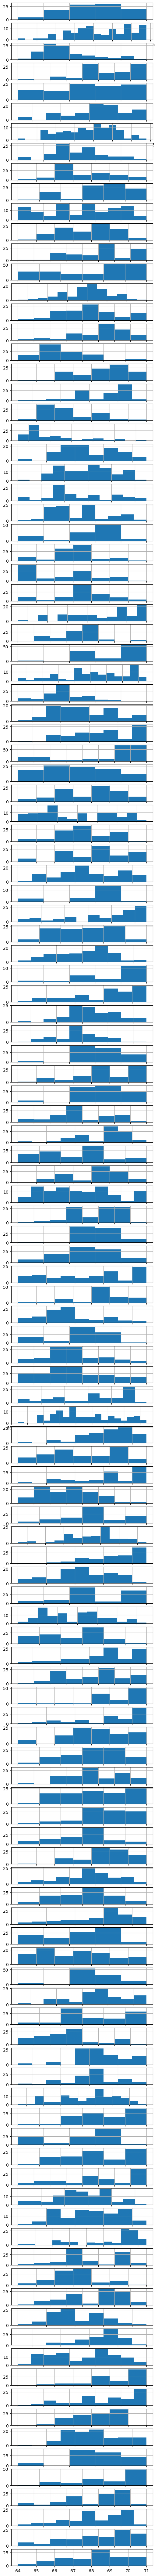

In [9]:
fig10, axes10 = plt.subplots(sweepPositions, 1)
for l in range(0,sweepPositions,1):
    df_max[l*rep:(l+1)*rep].hist(ax=axes10[l], range=(df_max[l*rep:(l+1)*rep].min(),df_max[l*rep:(l+1)*rep].max()), bins= df_max[l*rep:(l+1)*rep].max()- df_max[l*rep:(l+1)*rep].min())
#    standard.append(df_max[l*rep:(l+1)*rep].std())
#    avg.append(df_max[l*rep:(l+1)*rep].mean())
#axes3.set(xlabel= 'Number of digitized windows', ylabel='Amplitud [ADC counts]' )
plt.subplots_adjust( bottom=10, top=31)

plt.show()

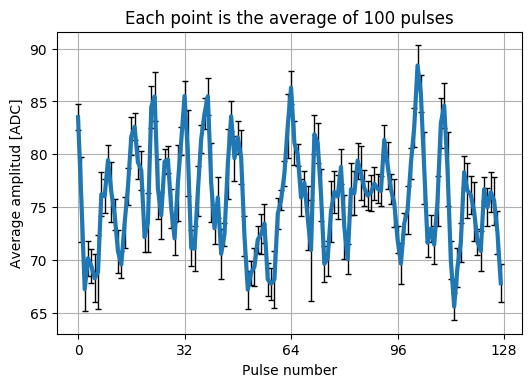

In [10]:
x =list(range(0,sweepPositions,1))
fig7,axes7 = plt.subplots(1,1)
axes7.errorbar(x,avg, yerr=standard, ecolor='k', capsize=2, lw=3, elinewidth=1)
#axes7.set(xticks=list(range(0,32*5,32)))
axes7.set(xlabel= 'Pulse number', ylabel='Average amplitud [ADC]' ,title='Each point is the average of 100 pulses',xticks=list(range(0,32*5,32)))
plt.grid()
plt.show()

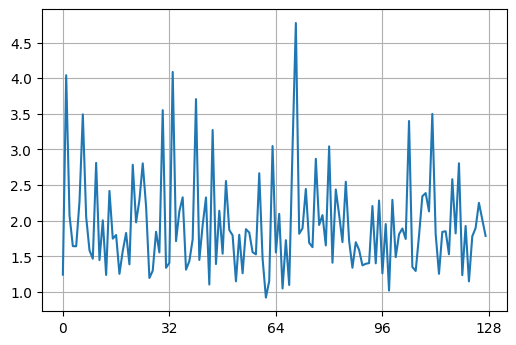

In [11]:
fig4,axes4 = plt.subplots(1,1)
axes4.plot(standard)
axes4.set(xticks=list(range(0,32*5,32)))
plt.grid()
plt.show()

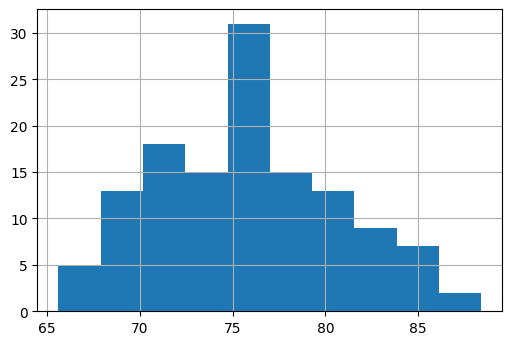

In [12]:
fig8,axes8 = plt.subplots(1,1)
axes8.hist(avg)
#axes8.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [13]:

standardIdx = list()
avg_idx = list()
#fig5, axes5 = plt.subplots(1, 1)
for l in range(0,sweepPositions,1):
  #  df_idxmax[m::256].plot(ax=axes5)
    standardIdx.append(df_idxmax[l*rep:(l+1)*rep].std())
    avg_idx.append(df_idxmax[l*rep:(l+1)*rep].mean())

#plt.show()

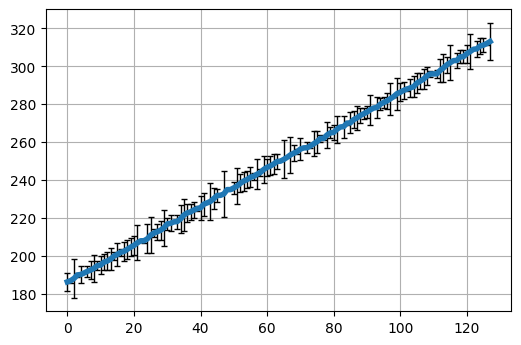

In [14]:
fig10,axes10 = plt.subplots(1,1)
axes10.errorbar(x,avg_idx, yerr=[x*10 for x in standardIdx], ecolor='k', capsize=2, lw=4, elinewidth=1)

#axes10.set(xticks=list(range(0,32*5,32)))
plt.grid()
plt.show()

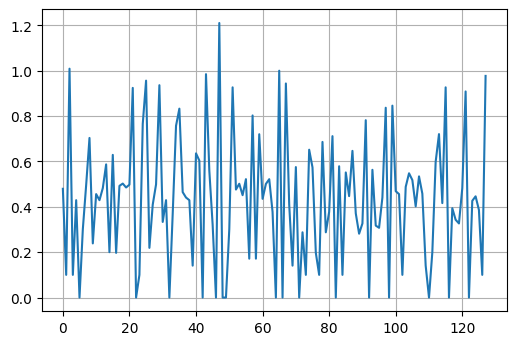

In [15]:
fig6,axes6 = plt.subplots(1,1)
axes6.plot(standardIdx)
#axes6.set(xticks=list(range(0,32*4,32)))
plt.grid()
plt.show()

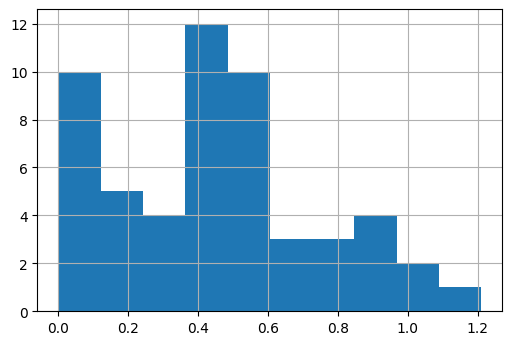

In [16]:
fig7,axes7 = plt.subplots(1,1)
axes7.hist(standardIdx[0:54])
#axes6.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [17]:
np.std(standardIdx[0:55])

0.297073422095032

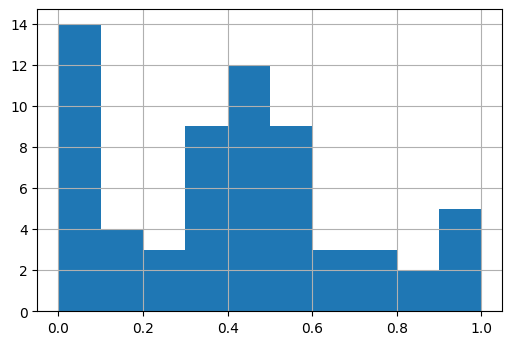

In [18]:
fig7,axes7 = plt.subplots(1,1)
axes7.hist(standardIdx[64:128])
#axes6.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [19]:
np.std(standardIdx[56:128])

0.2710204836331905